In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")  # 'whitegrid' is one of Seaborn's styles that uses gridlines

# Set the same color for grids in Matplotlib as Seaborn's default (usually light grey)
plt.rcParams['grid.color'] = '#b0b0b0'  # This is a light grey, similar to Seaborn's default
plt.rcParams['grid.linestyle'] = '-'    # Default linestyle for grids
plt.rcParams['grid.linewidth'] = 0.5    # Default linewidth for grids


## Read df

In [41]:
df = pd.read_csv('base_limpia.csv')

C:\Users\agustin\AppData\Local\Temp\ipykernel_18876\3757551460.py:1: DtypeWarning: Columns (63,64,81,83,92,93,95,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base_limpia.csv')


## Variables del Entorno (E)


## Variables de manejo

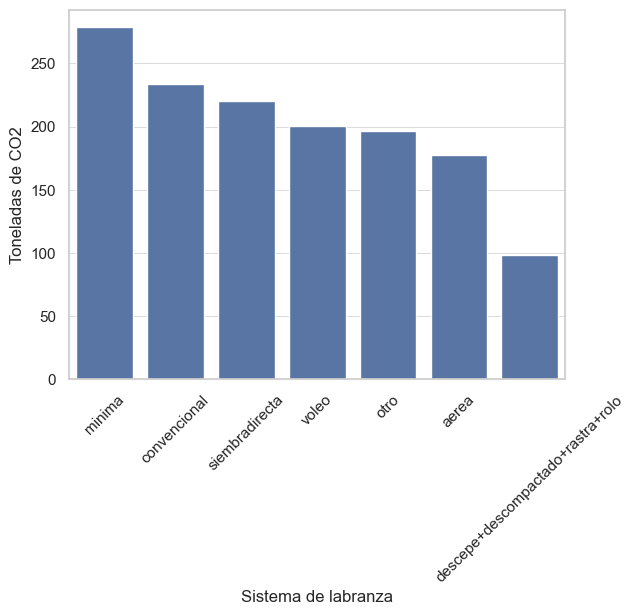

,sistema_labranza,TonCO2_ha
3,minima,278.489534
1,convencional,233.560392
5,siembradirecta,220.344173
6,voleo,200.564000
4,otro,196.794000
0,aerea,177.476520
2,descepe+descompactado+rastra+rolo,98.020000


In [48]:
agg = df.groupby(['sistema_labranza'])['TonCO2_ha'].mean().reset_index().sort_values(by = 'TonCO2_ha', ascending = False)


sns.barplot(x='sistema_labranza', y='TonCO2_ha', data=agg)

plt.xlabel('Sistema de labranza')
plt.ylabel('Toneladas de CO2')
plt.xticks(rotation=45)

# Show plot
plt.show()

agg

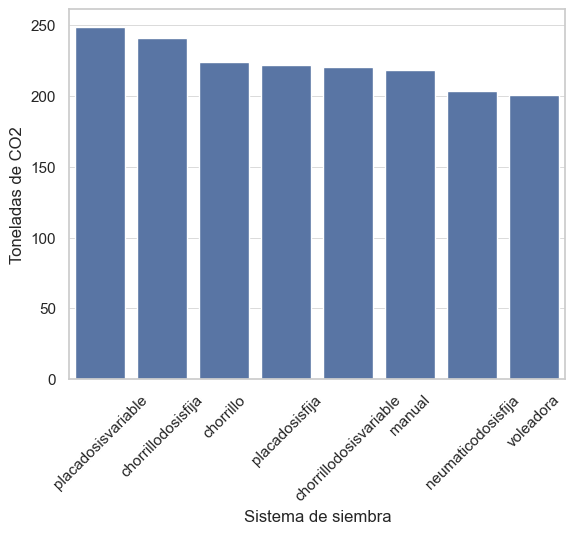

,sistema_siembra,TonCO2_ha
12,placadosisvariable,248.860488
2,chorrillodosisfija,241.421995
1,chorrillo,224.322449
11,placadosisfija,221.769933
3,chorrillodosisvariable,220.456970
4,manual,218.512878
7,neumaticodosisfija,203.387724
13,voleadora,200.564000


In [49]:
agg = df.groupby(['sistema_siembra'])['TonCO2_ha'].mean().reset_index().sort_values(by = 'TonCO2_ha', ascending = False).head(8)


sns.barplot(x='sistema_siembra', y='TonCO2_ha', data=agg)

plt.xlabel('Sistema de siembra')
plt.ylabel('Toneladas de CO2')
plt.xticks(rotation=45)

# Show plot
plt.show()
agg

In [6]:
fertilizantes_carbono = df.groupby(['fertilizante_1', 'fertilizante_2'])['TonCO2_ha'].mean()

print("Impacto de diferentes prácticas de fertilización en la cantidad de carbono secuestrado:")
print(fertilizantes_carbono)

Impacto de diferentes prácticas de fertilización en la cantidad de carbono secuestrado:
fertilizante_1           fertilizante_2       
10-46-2                  solmix                   190.008000
12-45-5-1                40-0-0-3                 224.139569
13-32-0-6                urea                     109.801250
13.6-10.8-0-6.5          uan(32)                  144.164800
                         urea                     158.375905
                                                     ...    
yarabelanitrodoble       sulfatodecalcio          203.580000
                         yarabelanitrodoble       133.332333
yaramilanitrocomplexzar  nitratoamoniocalcareo     98.020000
                         urea                     158.717000
                         ureaazufrada             167.388000
Name: TonCO2_ha, Length: 432, dtype: float64


Impacto del tipo de riego en la capacidad del suelo para retener carbono:


,riego,TonCO2_ha
0,no,185.685053
1,si,235.258915


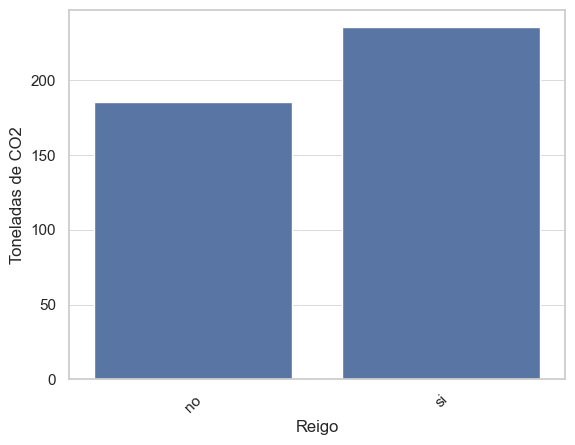

In [53]:
tipo_riego_carbono = df.groupby(['riego'])['TonCO2_ha'].mean().reset_index()

print("Impacto del tipo de riego en la capacidad del suelo para retener carbono:")

sns.barplot(x='riego', y='TonCO2_ha', data=tipo_riego_carbono)

plt.xlabel('Reigo')
plt.ylabel('Toneladas de CO2')
plt.xticks(rotation=45)
tipo_riego_carbono

In [8]:
correlacion_riego_materia_organica = df[['riego', 'materia_organica_porc', 'TonCO2_ha']].corr()

print("Correlación entre el tipo de riego, materia orgánica del suelo y secuestración de carbono:")
print(correlacion_riego_materia_organica)

ValueError: could not convert string to float: 'no'

## Variables de cultivo

,index,cultivo,TonCO2_ha,Dif. procentual
0,1,alpiste,348.951200,0.000000
1,14,lenteja,270.686000,-22.428695
2,15,lino,260.165451,-25.443601
3,22,ryegrass,260.130000,-25.453760
4,10,colza,241.002755,-30.935112
5,3,arveja,230.328932,-33.993942
6,21,rabanito,228.912616,-34.399820
7,8,cebadilla,221.676000,-36.473639
8,24,sorgo,219.127271,-37.204036
9,28,vicia,211.473123,-39.397508


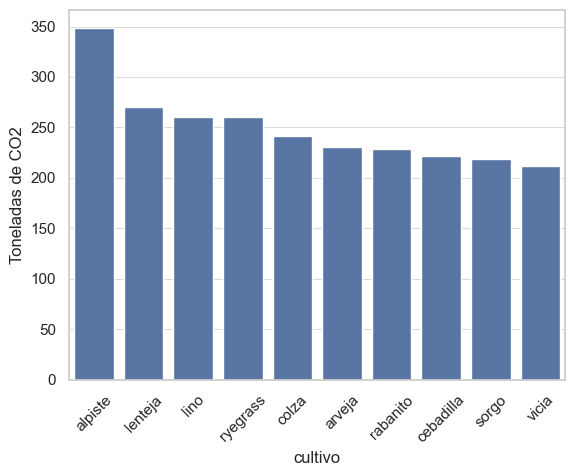

In [75]:
carbono_por_cultivo_genetica = df.groupby(['cultivo'])['TonCO2_ha'].mean().reset_index().sort_values(by='TonCO2_ha', ascending=False)
carbono_por_cultivo_genetica = carbono_por_cultivo_genetica.head(10)

# Calculate the base value (first value)
base_value = carbono_por_cultivo_genetica.iloc[0]['TonCO2_ha']

# Calculate percentage difference relative to the base value
carbono_por_cultivo_genetica['Dif. procentual'] = ((carbono_por_cultivo_genetica['TonCO2_ha'] / base_value) - 1) * 100

sns.barplot(x='cultivo', y='TonCO2_ha', data=carbono_por_cultivo_genetica)

plt.xlabel('cultivo')
plt.ylabel('Toneladas de CO2')
plt.xticks(rotation=45)

carbono_por_cultivo_genetica.reset_index()


In [76]:
correlacion_materia_organica = df['materia_organica_porc'].corr(df['diversidad_cultivos'])


KeyError: 'diversidad_cultivos'

In [86]:
print(df["sup_sembrada"].min())
print(df["sup_sembrada"].max())

0.0
2112.3


C:\Users\agustin\AppData\Local\Temp\ipykernel_18876\3301961333.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sup_semb_prov = df.groupby(["sup_sembrada_category"])["TonCO2_ha"].mean().reset_index().sort_values("TonCO2_ha", ascending=False)


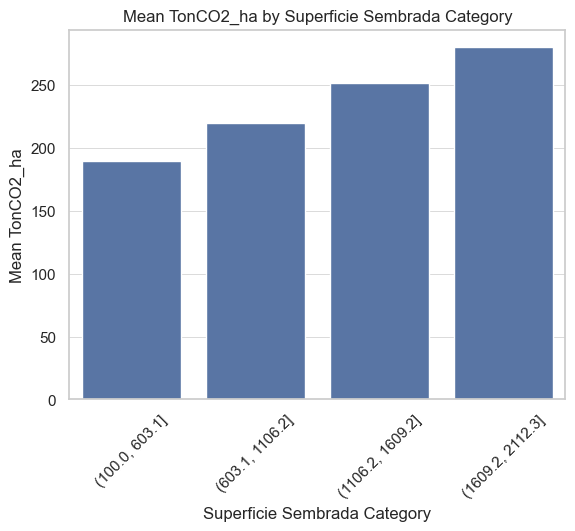

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the minimum and maximum values for the 'sup_sembrada' column
min_sup_sembrada = 0.0
max_sup_sembrada = 2112.3

# Define the number of categories you want
num_categories = 5

# Calculate the width of each category except for the first one
category_width = (max_sup_sembrada - 100) / (num_categories - 1)

# Define the category bins
category_bins = [100] + [100 + i * category_width for i in range(1, num_categories)]

# Create category bins
df['sup_sembrada_category'] = pd.cut(df['sup_sembrada'], bins=category_bins, precision=1)

# Group by the categorized 'sup_sembrada' column and calculate the mean of 'TonCO2_ha'
sup_semb_prov = df.groupby(["sup_sembrada_category"])["TonCO2_ha"].mean().reset_index().sort_values("TonCO2_ha", ascending=False)

# Create bar plot
sns.barplot(x='sup_sembrada_category', y='TonCO2_ha', data=sup_semb_prov)

# Add labels
plt.xlabel('Superficie Sembrada Category')
plt.ylabel('Mean TonCO2_ha')
plt.title('Mean TonCO2_ha by Superficie Sembrada Category')

# Show plot
plt.xticks(rotation=45)
plt.show()


Correlación entre rendimiento y Toneladas de carbono: 0.006437922918850204


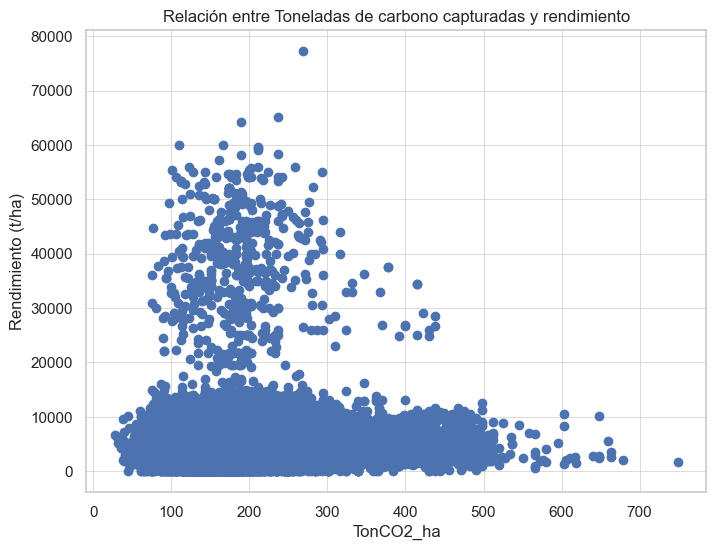

In [97]:
correlacion_rendimiento_mat_org = df['rendimiento_sup_cosechada'].corr(df['TonCO2_ha'])
correlacion_rendimiento_mat_org


# Print the correlation coefficient
print("Correlación entre rendimiento y Toneladas de carbono:", correlacion_rendimiento_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['TonCO2_ha'], df['rendimiento_sup_cosechada'])
plt.xlabel('TonCO2_ha')
plt.ylabel('Rendimiento (t/ha)')
plt.title('Relación entre Toneladas de carbono capturadas y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()


## Feature Eng - Perfil establecimiento

- Cantidad de campanas
- Algo con el cultivo
- fertilizantes usados
- rendimineto promedio
- usa_biotecnologia
- tiene_napa
- calidad_amb_prom
- sistema_siembra_moda
- sistema_labranza_moda